## dsedelist (delisting) from CRSP via WRDS
- dsedelist: daily stock event - delisting
- Link for CRSP at WRDS: https://wrds-www.wharton.upenn.edu/pages/about/data-vendors/center-for-research-in-security-prices-crsp/
- CRSP - MSE at WRDS: https://wrds-www.wharton.upenn.edu/pages/get-data/center-research-security-prices-crsp/annual-update/stock-events/delist/
- Info for identifiers (Stanford): https://libguides.stanford.edu/c.php?g=559845&p=6686228

-------------------------

### Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import wrds
pd.set_option('display.max_columns', None)

### Connect WRDS

In [2]:
conn=wrds.Connection()

Enter your WRDS username [yjaey]: yjaeyoon
Enter your password: ···············


WRDS recommends setting up a .pgpass file.


Create .pgpass file now [y/n]?:  y


Created .pgpass file successfully.
Loading library list...
Done


### Check variables in msf

In [3]:
conn.describe_table(library='crsp', table='dsedelist')

Approximately 36437 rows in crsp.dsedelist.


,name,nullable,type
0,permno,True,DOUBLE_PRECISION
1,dlstdt,True,DATE
2,dlstcd,True,DOUBLE_PRECISION
3,nwperm,True,DOUBLE_PRECISION
4,nwcomp,True,DOUBLE_PRECISION
5,nextdt,True,DATE
6,dlamt,True,DOUBLE_PRECISION
7,dlretx,True,DOUBLE_PRECISION
8,dlprc,True,DOUBLE_PRECISION
9,dlpdt,True,DATE


<b>Variables</b>:  
- <b>permco</b>: CRSP Permanent Company Number 
- <b>permno</b>: CRSP Permanent Stock (Share Class) Number 
- <b>dlstcd</b>: delisting code.
    - 100: active
    - 200: Mergers
    - 300: Exchanges
    - 400: Liquidations
    - 500: Dropped
    - 600: Expirations
    - 900: Domestics that became Foreign


------------

### Get data

In [4]:
conn.get_row_count(library='crsp', table='dsedelist')

36437

### Download msf data

In [5]:
df= conn.get_table(library='crsp', table='dsedelist')
print(df.shape)
df.head(2)

(36437, 19)


,permno,dlstdt,dlstcd,nwperm,nwcomp,nextdt,dlamt,dlretx,dlprc,dlpdt,dlret,permco,compno,issuno,hexcd,hsiccd,cusip,acperm,accomp
0,10000.0,1987-06-11,560.0,0.0,0.0,1987-06-12,0.21875,0.0,-0.21875,1987-06-12,0.0,7952.0,60007905.0,10396.0,3.0,3990.0,68391610,None,None
1,10001.0,2017-08-03,233.0,0.0,0.0,None,13.10000,0.0,0.00000,2017-08-04,0.0,7953.0,60007906.0,10398.0,2.0,4925.0,36720410,None,None


In [6]:
df=df[df['dlstcd']!=100]
print(df.shape)
df= df.sort_values('dlstdt')
df.head(2)

(26948, 19)


,permno,dlstdt,dlstcd,nwperm,nwcomp,nextdt,dlamt,dlretx,dlprc,dlpdt,dlret,permco,compno,issuno,hexcd,hsiccd,cusip,acperm,accomp
997,10997.0,1926-02-24,500.0,0.0,0.0,1926-02-27,0.563,0.126,-0.563,1926-02-27,0.126,28445.0,0.0,0.0,1.0,2910.0,12799090,None,None
3363,13514.0,1926-03-01,500.0,0.0,0.0,1926-04-30,0.000,NaN,-111.500,None,NaN,22445.0,0.0,0.0,1.0,4000.0,65299090,None,None


In [7]:
df['dlst_y']=pd.to_datetime(df['dlstdt']).dt.year
df.head(2)

,permno,dlstdt,dlstcd,nwperm,nwcomp,nextdt,dlamt,dlretx,dlprc,dlpdt,dlret,permco,compno,issuno,hexcd,hsiccd,cusip,acperm,accomp,dlst_y
997,10997.0,1926-02-24,500.0,0.0,0.0,1926-02-27,0.563,0.126,-0.563,1926-02-27,0.126,28445.0,0.0,0.0,1.0,2910.0,12799090,None,None,1926
3363,13514.0,1926-03-01,500.0,0.0,0.0,1926-04-30,0.000,NaN,-111.500,None,NaN,22445.0,0.0,0.0,1.0,4000.0,65299090,None,None,1926


In [8]:
df= df[df['dlst_y']>=1990]

In [9]:
df['dlstcd_1']= df['dlstcd']//100
dist= df.groupby(['dlst_y', 'dlstcd_1']).size().reset_index().pivot(index= 'dlst_y', columns='dlstcd_1', values= 0)
dist.head()

dlstcd_1,2.0,3.0,4.0,5.0
dlst_y,,,,
1990,204,4,9,345
1991,122,4,12,370
1992,137,73,9,400
1993,180,10,3,174
1994,283,7,3,203


In [14]:
dist= dist.rename(columns={2.0:'Mergers', 3.0:'Exchanges', 4.0:'Liquidiations', 5.0:'Dropped'})
dist.head(2)

dlstcd_1,Mergers,Exchanges,Liquidiations,Dropped
dlst_y,,,,
1990,204,4,9,345
1991,122,4,12,370


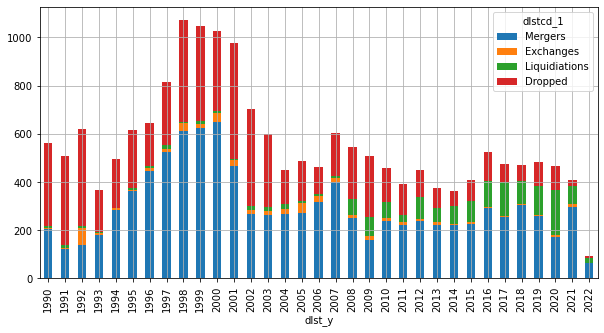

In [15]:
dist.plot(kind='bar', grid= True, stacked= True, figsize= (10,5))
plt.show()

---------

### Close connection

In [11]:
conn.close()

---------